In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date

In [2]:
## I acquire stock list in thailand ###
ex = pd.read_excel('data\\listedCompanies_th_TH.xlsx', sheet_name='listedCompanies_th_TH',skiprows=1)
df = pd.DataFrame(ex['หลักทรัพย์'].astype('str') + '.bk')
df['market'] = ex['ตลาด']
df = df.rename(columns={'หลักทรัพย์' : 'ticker'})
df = df.reset_index(drop=True)
# df = df[:25]

In [3]:
# df = pd.DataFrame(['MO','ASO','HPQ','AMCX','AMLX','CROX','KO'],columns=['ticker'])
# df

### Acquire informations from yfinance function >> .info

In [4]:
# 1st pulling date for this data #
df['date_pulling'] = date.today()

In [5]:
# 2nd acquiring information from .info #
info_attribute_list = [
    'industry',
    'sector',
    'marketCap',
    'currentPrice',
    'enterpriseValue',
    'totalCashPerShare'
]
# 3rd acquiring information from .quarterly_balance_sheet #
balancesheet_list = [
    'Total Assets',
    'Current Liabilities'
]

# 4th acquiring information from .quarterly_financials #
ttm = 4
financials_list = [
    'EBIT',
    'Operating Income'
]

info_attribute_list_buffer = []
balancesheet_list_buffer = []
financials_list_buffer = []
for i in range(len(df)):
    yfticker = yf.Ticker(df['ticker'][i])

    # 2nd acquiring information from .info #
    info_attribute_list_buffer_r = []
    for j in range(len(info_attribute_list)):
        try:
            info_attribute_list_buffer_r.append(yfticker.info[info_attribute_list[j]])
        except:
            info_attribute_list_buffer_r.append(None)
    info_attribute_list_buffer.append(info_attribute_list_buffer_r)

    # 3rd acquiring information from .balancesheet #
    balancesheet_list_buffer_r = []
    for j in range(len(balancesheet_list)):
        try:
            balancesheet_list_buffer_r.append(yfticker.quarterly_balance_sheet.loc[yfticker.quarterly_balance_sheet.index == balancesheet_list[j]].values[0][0])
        except:
            balancesheet_list_buffer_r.append(None)
    balancesheet_list_buffer.append(balancesheet_list_buffer_r)

    # 4th acquiring information from .quarterly_financials #
    financials_list_buffer_r = []
    for j in range(len(financials_list)):
        try:
            financials_list_buffer_r.append(np.array([yfticker.quarterly_financials.loc[yfticker.quarterly_financials.index == financials_list[j]].values[0][i] for i in range(ttm)]).sum())
        except:
            financials_list_buffer_r.append(None)
    try:
        financials_list_buffer_r.append(yfticker.quarterly_financials.columns[0])
    except:
        financials_list_buffer_r.append(None)
    financials_list_buffer.append(financials_list_buffer_r)

financials_list.append('ttm_latest')
df = df.join(pd.DataFrame(info_attribute_list_buffer, columns=info_attribute_list))
df = df.join(pd.DataFrame(balancesheet_list_buffer, columns=balancesheet_list))
df = df.join(pd.DataFrame(financials_list_buffer, columns=financials_list))


##### Drop NAN #############
df = df.dropna()
##### Drop where marketcap and EBIT < 0#############
df = df.loc[df['enterpriseValue'] >0]
df = df.loc[df['EBIT'] >0]
df = df.loc[df['Operating Income'] >0]
df = df.reset_index(drop=True)

df.to_csv('data\\data_stock_th.csv',index= False)

############################################################################

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
df = pd.read_csv('data\\data_stock_th.csv')
print('sector', df['sector'].unique())
print('industry', df['industry'].unique())

sector ['Basic Materials' 'Industrials' 'Real Estate' 'Consumer Defensive'
 'Utilities' 'Consumer Cyclical' 'Communication Services'
 'Financial Services' 'Healthcare' 'Technology' 'Energy']
industry ['Steel' 'Electrical Equipment & Parts' 'Real Estate - Development'
 'Packaged Foods' 'Airlines' 'Utilities - Renewable'
 'Auto & Truck Dealerships' 'Specialty Chemicals' 'Advertising Agencies'
 'Telecom Services' 'Credit Services' 'Textile Manufacturing' 'Auto Parts'
 'Medical Care Facilities' 'Farm Products' 'REIT - Retail'
 'REIT - Industrial' 'Capital Markets' 'Information Technology Services'
 'Waste Management' 'Industrial Distribution' 'REIT - Diversified'
 'Communication Equipment' 'Aluminum' 'Marine Shipping'
 'Scientific & Technical Instruments' 'Publishing' 'Real Estate Services'
 'Integrated Freight & Logistics' 'Airports & Air Services'
 'Household & Personal Products' 'Engineering & Construction'
 'Software - Application' 'Specialty Business Services'
 'Building Products & Eq

In [7]:

### Next I perform calculations for MF_ROC and MF_EY ###
represents_earning = 'Operating Income'

df['MF_ROC'] = df[represents_earning]/(df['Total Assets'] - df['Current Liabilities'])
df['MF_EY'] = df[represents_earning]/df['enterpriseValue']
df

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY
0,2S.bk,SET,2024-08-16,Steel,Basic Materials,1.594989e+09,2.90,1.336299e+09,0.498,2.400035e+09,3.039420e+08,1.225020e+08,1.041320e+08,2024-03-31,0.049679,0.077926
1,3K-BAT.bk,SET,2024-08-16,Electrical Equipment & Parts,Industrials,4.174800e+09,53.25,3.860087e+09,8.984,3.736470e+09,8.851644e+08,2.054459e+08,2.711131e+07,2024-03-31,0.009508,0.007023
2,A5.bk,mai,2024-08-16,Real Estate - Development,Real Estate,3.369080e+09,2.86,4.755004e+09,0.337,3.836102e+09,1.114288e+09,6.915935e+08,5.181232e+08,2024-03-31,0.190360,0.108964
3,AAI.bk,SET,2024-08-16,Packaged Foods,Consumer Defensive,1.296250e+10,6.10,1.213253e+10,0.468,5.828192e+09,5.910240e+08,9.276925e+08,8.961244e+08,2024-06-30,0.171109,0.073861
4,AAV.bk,SET,2024-08-16,Airlines,Industrials,2.827000e+10,2.20,7.139858e+10,0.124,7.252696e+10,2.862134e+10,3.279661e+09,3.208543e+09,2024-06-30,0.073078,0.044938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,YGG.bk,mai,2024-08-16,Entertainment,Communication Services,4.876176e+08,0.81,6.950683e+08,0.049,7.375050e+08,7.321346e+07,6.699039e+07,6.147763e+07,2024-03-31,0.092546,0.088448
611,YONG.bk,mai,2024-08-16,Building Materials,Basic Materials,8.092001e+08,1.19,1.302733e+09,0.065,1.304679e+09,3.079860e+08,1.533742e+08,1.510244e+08,2024-06-30,0.151525,0.115929
612,YUASA.bk,mai,2024-08-16,Auto Parts,Consumer Cyclical,1.151587e+09,10.70,7.629260e+08,3.881,1.684253e+09,4.092886e+08,1.939366e+08,1.814172e+08,2024-06-30,0.142292,0.237791
613,ZEN.bk,SET,2024-08-16,Restaurants,Consumer Cyclical,1.595290e+09,5.35,2.673630e+09,0.384,3.047779e+09,8.482120e+08,1.804910e+08,1.804910e+08,2024-06-30,0.082058,0.067508


<Axes: title={'center': 'mai'}, xlabel='MF_EY', ylabel='MF_ROC'>

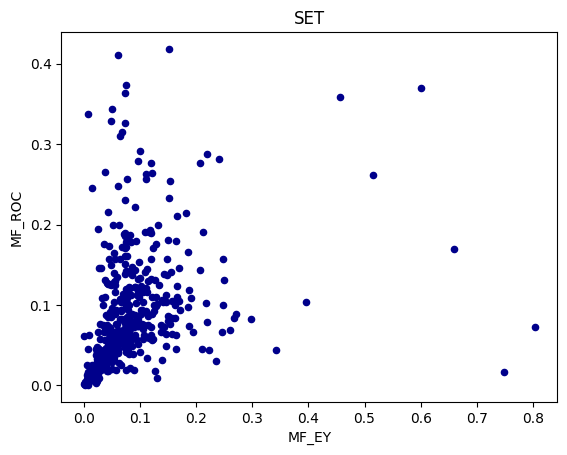

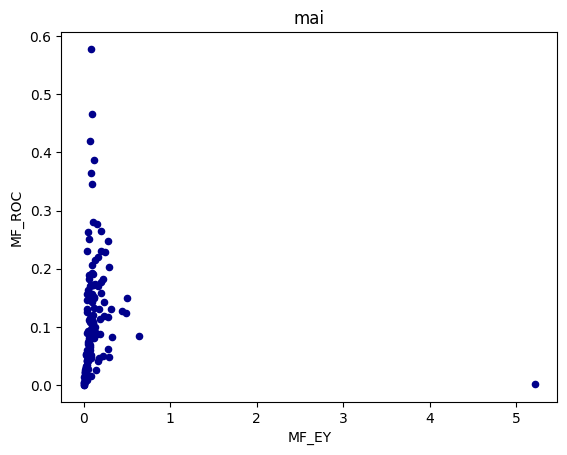

In [8]:
### Explore Market Cap ### By sector #### 
df.loc[df['market'] == 'SET'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'SET')
df.loc[df['market'] == 'mai'].plot.scatter(x='MF_EY',
                      y='MF_ROC',
                      c='DarkBlue',title = 'mai')

In [9]:
### Drop Utilities, Energy, and Financial Services  as suggested from the book ###
sectortoexclude = [
    'Utilities',
    'Energy',
    'Financial Services',
    'Real Estate'
]
for i in sectortoexclude:
    print('exclude sector > ',i)
    try:
         
        df = df.loc[df['sector'] != i]
    except:
        None
        
industrytoexclude =[
    'Engineering & Construction',
    'Building Products & Equipment',
    'Building Materials'
]
for i in industrytoexclude:
    print('exclude industry > ',i)
    try:
         
        df = df.loc[df['industry'] != i]
    except:
        None

df = df.reset_index(drop=True)

exclude sector >  Utilities
exclude sector >  Energy
exclude sector >  Financial Services
exclude sector >  Real Estate
exclude industry >  Engineering & Construction
exclude industry >  Building Products & Equipment
exclude industry >  Building Materials


In [10]:
#### Select market size by choosing ' market ' ###
market = 'SET'
df_market = df.loc[df['market'] == market]
df_market = df_market.reset_index(drop=True)

In [11]:
### Ranking regarding MFs####

df_market['Ranking_MF_ROC'] = df_market['MF_ROC'].rank()
df_market['Ranking_MF_EY'] = df_market['MF_EY'].rank()
df_market['Ranking_MF'] = df_market['Ranking_MF_ROC'] + df_market['Ranking_MF_EY']

df_market.loc[df_market['Ranking_MF'] == df_market['Ranking_MF'].max()]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
297,UVAN.bk,SET,2024-08-16,Farm Products,Consumer Defensive,8.178000e+09,8.7,7.083260e+09,1.457,5.792787e+09,516741000.0,1.443106e+09,1.462381e+09,2024-06-30,0.277174,0.206456,293.0,292.0,585.0


In [12]:
numstocks = 50
df_sorted = df_market.sort_values(by=['Ranking_MF'],ascending=False)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted[:numstocks]

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
0,UVAN.bk,SET,2024-08-16,Farm Products,Consumer Defensive,8.178000e+09,8.70,7.083260e+09,1.457,5.792787e+09,5.167410e+08,1.443106e+09,1.462381e+09,2024-06-30,0.277174,0.206456,293.0,292.0,585.0
1,PT.bk,SET,2024-08-16,Information Technology Services,Technology,2.569196e+09,9.05,2.624889e+09,0.078,2.410914e+09,1.457667e+09,3.886185e+08,3.988328e+08,2024-06-30,0.418394,0.151943,305.0,273.0,578.0
2,KBS.bk,SET,2024-08-16,Confectioners,Consumer Defensive,2.964000e+09,4.94,8.448462e+09,0.139,1.403379e+10,4.658636e+09,1.701101e+09,1.792721e+09,2024-06-30,0.191220,0.212195,273.0,295.0,568.0
3,ICN.bk,SET,2024-08-16,Telecom Services,Communication Services,1.270269e+09,1.89,1.174485e+09,0.277,1.976144e+09,9.799810e+08,2.150695e+08,2.134139e+08,2024-06-30,0.214236,0.181709,281.0,287.0,568.0
4,BIZ.bk,SET,2024-08-16,Medical Devices,Healthcare,1.850264e+09,3.08,1.427995e+09,1.103,1.669257e+09,5.431380e+08,2.524842e+08,2.370027e+08,2024-03-31,0.210460,0.165969,280.0,283.0,563.0
5,CPW.bk,SET,2024-08-16,Electronics & Computer Distribution,Technology,1.452000e+09,2.42,1.719917e+09,0.168,1.949275e+09,9.017210e+08,1.707424e+08,2.656660e+08,2024-03-31,0.253606,0.154464,287.0,275.0,562.0
6,AS.bk,SET,2024-08-16,Electronic Gaming & Multimedia,Communication Services,1.657500e+09,3.32,1.539945e+09,0.707,1.406244e+09,4.061850e+08,3.326363e+08,2.331491e+08,2024-06-30,0.233135,0.151401,285.0,272.0,557.0
7,UTP.bk,SET,2024-08-16,Paper & Paper Products,Basic Materials,7.150000e+09,11.00,5.159186e+09,2.874,5.175989e+09,4.462890e+08,9.613716e+08,8.489970e+08,2024-06-30,0.179503,0.164560,265.0,280.0,545.0
8,AKR.bk,SET,2024-08-16,Electrical Equipment & Parts,Industrials,1.251115e+09,0.85,1.492362e+09,0.085,2.352730e+09,6.708405e+08,2.817950e+08,2.781737e+08,2024-03-31,0.165394,0.186398,255.0,289.0,544.0
9,SUN.bk,SET,2024-08-16,Farm Products,Consumer Defensive,3.126948e+09,4.04,3.238393e+09,0.042,2.172344e+09,7.632173e+08,3.780080e+08,3.896977e+08,2024-06-30,0.276553,0.120337,292.0,246.0,538.0


In [13]:
df_sorted_2 = df_sorted[:numstocks].copy()
df_sorted_2 = df_sorted_2.sort_values(by=['totalCashPerShare'],ascending=False)
df_sorted_2 = df_sorted_2.reset_index(drop=True)
df_sorted_2

,ticker,market,date_pulling,industry,sector,marketCap,currentPrice,enterpriseValue,totalCashPerShare,Total Assets,Current Liabilities,EBIT,Operating Income,ttm_latest,MF_ROC,MF_EY,Ranking_MF_ROC,Ranking_MF_EY,Ranking_MF
0,METCO.bk,SET,2024-08-16,Electronic Components,Technology,3.751191e+09,179.50,1.853029e+09,98.090,9.200357e+09,2.138398e+09,8.879703e+08,7.319250e+08,2024-06-30,0.103643,0.394988,191.0,304.0,495.0
1,ALUCON.bk,SET,2024-08-16,Aluminum,Basic Materials,7.516800e+09,174.00,4.499016e+09,70.856,7.890793e+09,5.772030e+08,7.327545e+08,7.327545e+08,2024-03-31,0.100191,0.162870,183.0,279.0,462.0
2,KDH.bk,SET,2024-08-16,Medical Care Facilities,Healthcare,1.744578e+09,90.00,1.154449e+09,30.919,9.234060e+08,1.578040e+08,1.594004e+08,1.527765e+08,2024-06-30,0.199551,0.132337,277.0,257.0,534.0
3,SHANG.bk,SET,2024-08-16,Lodging,Consumer Cyclical,6.305000e+09,48.50,2.552327e+09,28.513,8.086747e+09,3.353090e+08,6.933550e+08,6.933550e+08,2024-03-31,0.089449,0.271656,169.0,302.0,471.0
4,THIP.bk,SET,2024-08-16,Packaging & Containers,Consumer Cyclical,2.519992e+09,28.00,1.470126e+09,12.063,3.354000e+09,5.469870e+08,3.744054e+08,2.723403e+08,2024-03-31,0.097021,0.185250,178.0,288.0,466.0
5,SPC.bk,SET,2024-08-16,Food Distribution,Consumer Defensive,1.969896e+10,60.00,1.617309e+10,11.506,3.785917e+10,8.370863e+09,3.432795e+09,2.764893e+09,2024-06-30,0.093762,0.170956,177.0,286.0,463.0
6,AH.bk,SET,2024-08-16,Auto Parts,Consumer Cyclical,5.930981e+09,17.10,8.912730e+09,6.173,2.547749e+10,1.105056e+10,1.848404e+09,1.510809e+09,2024-03-31,0.104721,0.169511,194.0,284.0,478.0
7,NTV.bk,SET,2024-08-16,Medical Care Facilities,Healthcare,4.800000e+09,30.00,3.673487e+09,6.041,2.893072e+09,2.475280e+08,4.516894e+08,4.516894e+08,2024-06-30,0.170736,0.122959,256.0,249.0,505.0
8,TOA.bk,SET,2024-08-16,Specialty Chemicals,Basic Materials,3.397586e+10,17.00,2.817829e+10,4.301,2.133163e+10,5.077793e+09,3.306872e+09,3.098446e+09,2024-06-30,0.190629,0.109959,272.0,234.0,506.0
9,PMTA.bk,SET,2024-08-16,Agricultural Inputs,Basic Materials,8.602000e+08,8.50,9.694970e+08,4.293,2.669535e+09,8.187940e+08,2.343163e+08,2.419880e+08,2024-06-30,0.130752,0.249602,223.0,300.0,523.0
